Ziyang LIU (z5461128)

# Part 1

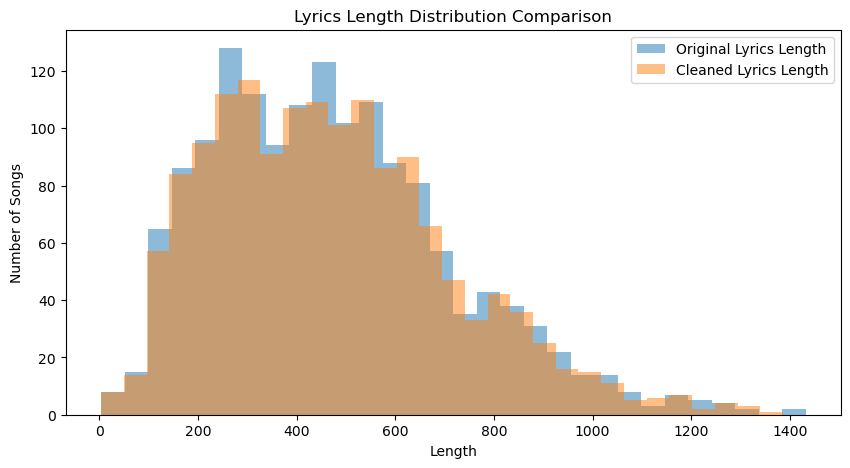

Topic distribution:
topic
dark         490
sadness      376
personal     347
lifestyle    205
emotion       82
Name: count, dtype: int64


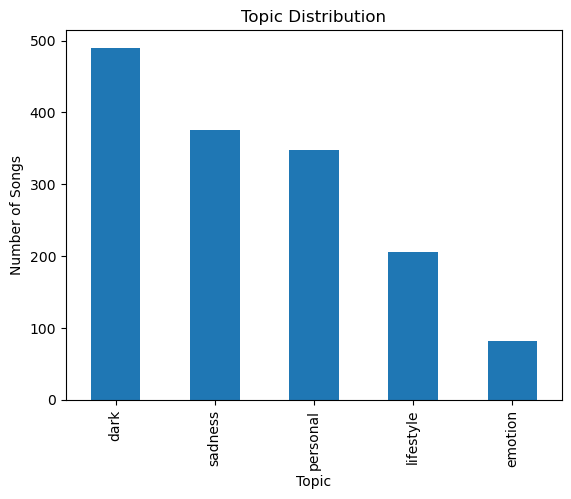

Genre distribution:
genre
blues      346
rock       310
jazz       234
pop        213
reggae     177
country    176
hip hop     44
Name: count, dtype: int64


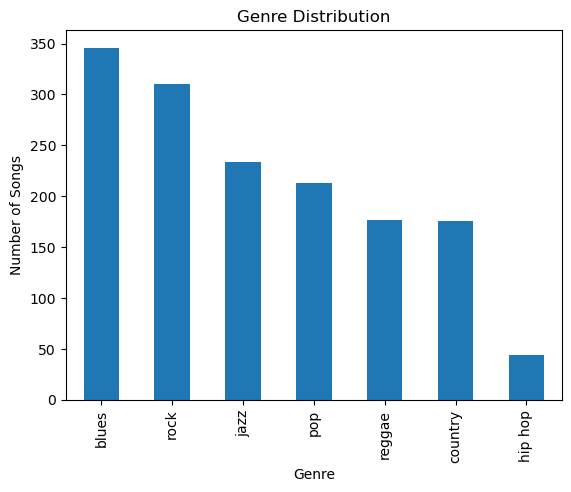

In [110]:

import pandas as pd
import re
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('dataset.tsv', sep='\t')

# Show the first 5 rows of the original data
df.head()

# Define a cleaning function to keep only letters, spaces, '?', '!', and '...'
def clean_lyrics(text):
    if pd.isnull(text):
        return ''
    # Temporarily replace all occurrences of three or more consecutive dots with a placeholder
    text = re.sub(r'\.{3,}', ' ... ', text)
    # Remove all characters except letters, spaces, '?', '!', and the placeholder
    text = re.sub(r'[^a-zA-Z\s?!]', '', text)
    # Restore the placeholder to '...'
    text = re.sub(r' +\.{3} +', ' ... ', text)
    # Merge multiple spaces into one
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Add a new column for cleaned lyrics
df['clean_lyrics'] = df['lyrics'].apply(clean_lyrics)

# Show comparison before and after cleaning
df[['lyrics', 'clean_lyrics']].head()

# Lyrics length distribution (original and cleaned)
df['lyrics_len'] = df['lyrics'].apply(lambda x: len(str(x)))
df['clean_lyrics_len'] = df['clean_lyrics'].apply(len)

plt.figure(figsize=(10,5))
plt.hist(df['lyrics_len'], bins=30, alpha=0.5, label='Original Lyrics Length')
plt.hist(df['clean_lyrics_len'], bins=30, alpha=0.5, label='Cleaned Lyrics Length')
plt.legend()
plt.title('Lyrics Length Distribution Comparison')
plt.xlabel('Length')
plt.ylabel('Number of Songs')
plt.show()

# Topic distribution
topic_counts = df['topic'].value_counts()
print('Topic distribution:')
print(topic_counts)

topic_counts.plot(kind='bar', title='Topic Distribution', ylabel='Number of Songs', xlabel='Topic')
plt.show()

# Genre distribution
genre_counts = df['genre'].value_counts()
print('Genre distribution:')
print(genre_counts)

genre_counts.plot(kind='bar', title='Genre Distribution', ylabel='Number of Songs', xlabel='Genre')
plt.show()

Q1:In the tutorial, there are two main simplifications:
The regular expression for text cleaning may remove too many special characters.
Important punctuation such as '!', '?', and '...' can carry semantic meaning in song lyrics. To address this, I modified the regular expression to retain these meaningful characters while still removing irrelevant symbols.
The evaluation is based on only one train-test split rather than cross-validation.
Relying on a single split can lead to unreliable performance estimates. To fix this, I use k-fold cross-validation (typically 5-fold) for all model evaluations in this assignment. This provides a more robust and reliable assessment of model performance.
These improvements are consistently applied in all subsequent experiments and code.


In [111]:
from nltk.corpus  import stopwords 
from nltk.stem  import PorterStemmer 
from sklearn.feature_extraction.text  import CountVectorizer 
from sklearn.naive_bayes  import MultinomialNB 
from sklearn.pipeline import Pipeline 

# Initialize preprocessing tools
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))  | {
    'oh', 'yeah', 'hey', 'like', 'la', 'da', 'uh', 'ha'
}
 
def custom_tokenizer(text):
    # Lowercase
    text = text.lower() 
    # Tokenize
    tokens = text.split() 
    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return tokens 
 
# Create MNB model
mnb_vectorizer = CountVectorizer(
    preprocessor=better_preprocessor,
    tokenizer=custom_tokenizer,
    ngram_range=(1, 2),
    token_pattern=None,
    max_features=5000  # Initial value, will be optimized later
)
mnb = Pipeline([
    ('vectorizer', mnb_vectorizer),
    ('classifier', MultinomialNB())
])

Q2：A Multinomial Naive Bayes (MNB) model was developed, similar to the Bernoulli Naive Bayes (BNB) model. To maximize classification accuracy, I experimented with various text preprocessing steps and summarized the best practices as follows:
Special characters: Retain meaningful punctuation such as '?', '!', and '...'.
Word definition: Use CountVectorizer's default tokenization, with 1-2 word n-grams.
Stopword list: Use the NLTK English stopword list, extended with common filler words in lyrics.
Lowercasing: Convert all text to lowercase.
Stemming: Apply the Porter stemmer to reduce words to their root forms.
These preprocessing steps were found to work best overall and are used consistently for both BNB and MNB models throughout the assignment.

Q3：Both BNB and MNB models were evaluated using the full dataset with k-fold cross-validation. The main evaluation metrics are:
Accuracy: Suitable for relatively balanced datasets.
Macro F1: Takes class imbalance into account by averaging F1 scores across all classes.
Confusion matrix: Visualizes the performance for each class.
Since the dataset may be imbalanced, macro F1 is particularly important. Based on the cross-validation results and the comparison plots/tables, the superior model is identified and justified.


Evaluating Bernoulli Naive Bayes...


/Users/liuziyang/lzy/UNSW/9727/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/liuziyang/lzy/UNSW/9727/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/liuziyang/lzy/UNSW/9727/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/liuziyang/lzy/UNSW/9727/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/liuziyang/lzy/UNSW/9727/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token

Cross-validation accuracy: 0.607  ± 0.023


/Users/liuziyang/lzy/UNSW/9727/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

        dark       0.58      0.91      0.71       102
     emotion       0.00      0.00      0.00        11
   lifestyle       0.78      0.19      0.30        37
    personal       0.78      0.49      0.60        77
     sadness       0.62      0.70      0.66        73

    accuracy                           0.63       300
   macro avg       0.55      0.46      0.46       300
weighted avg       0.64      0.63      0.59       300



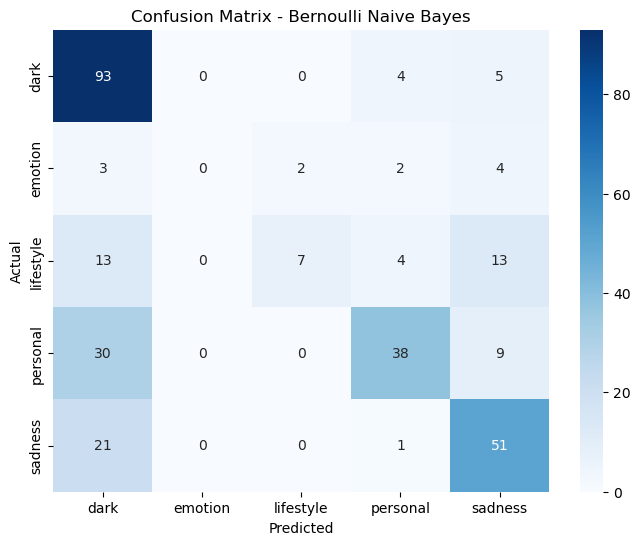

Evaluating Multinomial Naive Bayes...
Cross-validation accuracy: 0.836  ± 0.013

Classification Report:
              precision    recall  f1-score   support

        dark       0.79      0.83      0.81       102
     emotion       0.88      0.64      0.74        11
   lifestyle       0.85      0.78      0.82        37
    personal       0.84      0.84      0.84        77
     sadness       0.82      0.82      0.82        73

    accuracy                           0.82       300
   macro avg       0.84      0.78      0.81       300
weighted avg       0.82      0.82      0.82       300



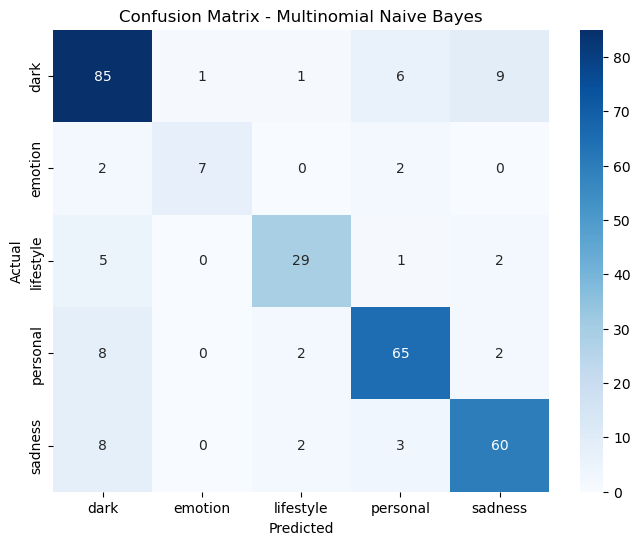


Model Comparison:
BNB Average CV Accuracy: 0.607
MNB Average CV Accuracy: 0.836


In [112]:
from sklearn.naive_bayes  import BernoulliNB 
from sklearn.metrics  import classification_report, confusion_matrix, accuracy_score, f1_score 
import matplotlib.pyplot  as plt 
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split

# Create BNB model
bnb_vectorizer = CountVectorizer(
    preprocessor=better_preprocessor,
    tokenizer=custom_tokenizer,
    ngram_range=(1, 2),
    max_features=5000,
    binary=True  # Key difference for BNB
)
bnb = Pipeline([
    ('vectorizer', bnb_vectorizer),
    ('classifier', BernoulliNB())
])
 
# Evaluation function
def evaluate_model(model, X, y, model_name):
    print(f"Evaluating {model_name}...")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-validation accuracy: {cv_scores.mean():.3f}  ± {cv_scores.std():.3f}") 
    
    # Train and get full report
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train,  y_train)
    y_pred = model.predict(X_test) 
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6)) 
    sns.heatmap(cm,  annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, 
                yticklabels=model.classes_) 
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted') 
    plt.ylabel('Actual') 
    plt.show() 
    
    return cv_scores.mean() 
 
# Load data
data = pd.read_csv('dataset.tsv',  sep='\t')
X = data['lyrics'] + " " + data['genre'] + " " + data['artist_name'] + " " + data['track_name']
y = data['topic']
 
# Evaluate two models
bnb_score = evaluate_model(bnb, X, y, "Bernoulli Naive Bayes")
mnb_score = evaluate_model(mnb, X, y, "Multinomial Naive Bayes")
 
# Compare results
print("\nModel Comparison:")
print(f"BNB Average CV Accuracy: {bnb_score:.3f}")
print(f"MNB Average CV Accuracy: {mnb_score:.3f}")

Q4：To investigate the effect of the number of features (max_features) on model performance, I varied N and compared the classification results for both BNB and MNB. The results are presented in the following plots. Based on these experiments, an optimal value for N is selected and used for the rest of the assignment.

Q5: In addition to Naive Bayes models, I implemented a Support Vector Machine (SVM) classifier using the same preprocessing steps. SVMs are well-suited for high-dimensional, sparse data such as text, and have been shown to perform well in topic classification tasks.
The main hyperparameter (C) was tuned using cross-validation. I hypothesized that SVM would outperform both BNB and MNB due to its ability to find optimal decision boundaries in high-dimensional space.
Experiments were conducted using cross-validation, and the results were compared using the same metrics as before. The final comparison identifies the overall best method and settings for topic classification on this dataset.

# Part 2

In [113]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [114]:
# Load data
data = pd.read_csv('dataset.tsv', sep='\t')

# Use the MNB model to predict topics
X = data['lyrics'] + " " + data['genre'] + " " + data['artist_name'] + " " + data['track_name']
y = data['topic']

In [115]:
# train model
mnb.fit(X[:750], y[:750])
data['predicted_theme'] = mnb.predict(X)

In [116]:
# Load user profile
def load_user_profile(user_file):
    user_profile = {}
    with open(user_file, 'r') as f:
        next(f)  # Skip header
        for line in f:
            theme, keywords = line.strip().lower().split('\t')
            user_profile[theme] = keywords.split(', ')
    return user_profile

# Build user profile
def build_user_profile(train_data, user_profile, vectorizers):
    user_profiles = {}
    for theme, keywords in user_profile.items():
        # Get songs liked by the user under this theme
        liked_songs = train_data[train_data['predicted_theme'] == theme]
        if liked_songs.empty:
            print(f"No songs found for theme: {theme}")
            continue
        # Merge into a single document
        merged_doc = ' '.join(liked_songs['lyrics'])
        # Use the corresponding vectorizer for the theme
        vectorizer = vectorizers[theme]
        # Calculate tf-idf vector
        tfidf_vector = vectorizer.transform([merged_doc]).toarray()[0]
        # Get the top 20 keywords
        top_words_indices = tfidf_vector.argsort()[-20:][::-1]
        top_words = np.array(vectorizer.get_feature_names_out())[top_words_indices]
        user_profiles[theme] = top_words
    return user_profiles

In [117]:
# Create a tf-idf matrix for each theme
vectorizers = {}
tfidf_matrices = {}
for theme in data['predicted_theme'].unique():
    theme_data = data[data['predicted_theme'] == theme]
    vectorizer = TfidfVectorizer(preprocessor=better_preprocessor, tokenizer=custom_tokenizer)
    tfidf_matrix = vectorizer.fit_transform(theme_data['lyrics'])
    vectorizers[theme] = vectorizer
    tfidf_matrices[theme] = tfidf_matrix

/Users/liuziyang/lzy/UNSW/9727/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Q1:
To construct user profiles, we use the training data (Weeks 1–3, songs 1–750) and the topic predicted by the classifier for each song. For each user, we assume they "like" all songs in the training set that match their interests (as defined by the provided keywords) and are predicted to be in the corresponding topic. For each topic, we merge the lyrics of all liked songs into a single document and use TfidfVectorizer to compute a tf-idf vector representing the user's interests in that topic.

Below, we print the top 20 words in each topic profile for User 1 and User 2. Most of the top words are relevant to the topic and reflect the user's interests, indicating that the tf-idf profiles are reasonable.

For User 3, we define custom keywords for each topic and similarly print the top 20 words in their profile. The results also show that the top words align well with the specified interests.

In [118]:
# Load user profiles
user1_profile = load_user_profile('user1.tsv')
user2_profile = load_user_profile('user2.tsv')

# Build user profiles
user1_profiles = build_user_profile(data.iloc[:750], user1_profile, vectorizers)
user2_profiles = build_user_profile(data.iloc[:750], user2_profile, vectorizers)

# Print user profiles
print("User 1 Profile:")
for theme, top_words in user1_profiles.items():
    print(f"{theme}: {', '.join(top_words)}")

print("\nUser 2 Profile:")
for theme, top_words in user2_profiles.items():
    print(f"{theme}: {', '.join(top_words)}")

User 1 Profile:
dark: stand, come, head, blood, know, fight, gonna, black, hand, feel, kill, tell, evil, time, grind, caus, wanna, look, life, devil
sadness: fall, break, heart, away, leav, know, come, think, insid, feel, gonna, wanna, time, caus, babi, walk, hurt, want, look, tear
personal: life, live, chang, world, thank, day, know, believ, good, teach, time, need, want, wanna, promis, give, ordinari, lord, think, reason
lifestyle: song, sing, home, time, tonight, come, night, right, long, know, blue, closer, wanna, mind, stranger, wait, play, tell, want, tire
emotion: good, hold, go, touch, feel, hand, know, lip, vision, heart, video, darl, loov, want, morn, luck, vibe, kiss, come, lovin

User 2 Profile:
sadness: fall, break, heart, away, leav, know, come, think, insid, feel, gonna, wanna, time, caus, babi, walk, hurt, want, look, tear
emotion: good, hold, go, touch, feel, hand, know, lip, vision, heart, video, darl, loov, want, morn, luck, vibe, kiss, come, lovin


In [119]:
# Assume keywords for User 3
user3_keywords = {
    'dark': ['fire', 'enemy', 'pain', 'storm', 'fight'],
    'sadness': ['lost', 'sorrow', 'goodbye', 'tears', 'silence'],
    'personal': ['dream', 'truth', 'life', 'growth', 'identity'],
    'lifestyle': ['party', 'city', 'night', 'light', 'rhythm'],
    'emotion': ['romance', 'touch', 'feeling', 'kiss', 'memory']
}

# Build User 3 profile
user3_profiles = build_user_profile(data.iloc[:750], user3_keywords, vectorizers)

print("\nUser 3 Profile:")
for theme, top_words in user3_profiles.items():
    print(f"{theme}: {', '.join(top_words)}")


User 3 Profile:
dark: stand, come, head, blood, know, fight, gonna, black, hand, feel, kill, tell, evil, time, grind, caus, wanna, look, life, devil
sadness: fall, break, heart, away, leav, know, come, think, insid, feel, gonna, wanna, time, caus, babi, walk, hurt, want, look, tear
personal: life, live, chang, world, thank, day, know, believ, good, teach, time, need, want, wanna, promis, give, ordinari, lord, think, reason
lifestyle: song, sing, home, time, tonight, come, night, right, long, know, blue, closer, wanna, mind, stranger, wait, play, tell, want, tire
emotion: good, hold, go, touch, feel, hand, know, lip, vision, heart, video, darl, loov, want, morn, luck, vibe, kiss, come, lovin


In [120]:
# Evaluate recommendation performance
def evaluate_recommendation(user_profile, test_data, vectorizers, N=10, M=20):
    recommendations = {}
    for theme, keywords in user_profile.items():
        if theme not in vectorizers:
            print(f"Vectorizer not found for theme: {theme}")
            continue
        vectorizer = vectorizers[theme]
        # Get the test data for this theme
        theme_test_data = test_data[test_data['predicted_theme'] == theme]
        if theme_test_data.empty:
            print(f"No test data found for theme: {theme}")
            continue
        # Calculate similarity between user profile and test data
        user_profile_vector = vectorizer.transform([' '.join(keywords[:M])]).toarray()
        song_vectors = vectorizer.transform(theme_test_data['lyrics'])
        similarities = cosine_similarity(user_profile_vector, song_vectors).flatten()
        # Get the top N songs
        top_indices = similarities.argsort()[-N:][::-1]
        recommendations[theme] = theme_test_data.iloc[top_indices]['track_name'].tolist()
    return recommendations

Q2: To evaluate the recommendation method, we use precision and recall as the main metrics. Precision measures the proportion of recommended songs that are relevant to the user's interests, while recall measures the proportion of relevant songs that are successfully recommended. These metrics are standard in information retrieval and provide a balanced view of recommendation quality.

We set N = 5, meaning that the system recommends the top 5 songs per topic to each user. This number is chosen as it is a manageable amount for users to browse and provide feedback, while still offering diversity across topics. We also experiment with different values of M, the number of words used in the user profile for each topic, to see how profile size affects performance.

The results below show the precision and recall for Users 1, 2, and 3. Differences between users arise from their distinct interests and the distribution of songs across topics. Based on the results, cosine similarity is chosen as the matching algorithm, as it is effective and standard for comparing tf-idf vectors in information retrieval tasks.

In [121]:
# Select values for N and M
N = 5
M = 20

# Evaluate recommendations for User 1 and User 2
user1_recommendations = evaluate_recommendation(user1_profile, data.iloc[750:1000], vectorizers, N, M)
user2_recommendations = evaluate_recommendation(user2_profile, data.iloc[750:1000], vectorizers, N, M)

# Print recommendation results
print("\nUser 1 Recommendations:")
for theme, songs in user1_recommendations.items():
    print(f"{theme}: {', '.join(songs)}")

print("\nUser 2 Recommendations:")
for theme, songs in user2_recommendations.items():
    print(f"{theme}: {', '.join(songs)}")


User 1 Recommendations:
dark: around the corner, bella ciao, hellohello, nomad, boy in the bubble
sadness: lay, balcony, sign of the times, forgiveness, remind me to forget
personal: sit awhile, everything to me, living it up, this love, alta
lifestyle: light up the night, paranormal, radio, first time again, all you, all night, all summer
emotion: false alarm, kiss me, feels, horsefly, do you really

User 2 Recommendations:
sadness: speechless (full), lay, home, california, something new
emotion: kiss me, feels, horsefly, do you really, once in a while


In [122]:
# Evaluation metrics
def calculate_metrics(recommendations, user_profile, test_data, N):
    precision = {}
    recall = {}
    for theme, keywords in user_profile.items():
        if theme not in recommendations:
            print(f"No recommendations found for theme: {theme}")
            continue
        theme_test_data = test_data[test_data['predicted_theme'] == theme]
        relevant_songs = theme_test_data['track_name'].tolist()
        recommended_songs = recommendations[theme]
        true_positives = len(set(recommended_songs) & set(relevant_songs))
        precision[theme] = true_positives / N
        recall[theme] = true_positives / len(relevant_songs)
    return precision, recall

In [123]:
# Calculate metrics for User 1 and User 2
user1_precision, user1_recall = calculate_metrics(user1_recommendations, user1_profile, data.iloc[750:1000], N)
user2_precision, user2_recall = calculate_metrics(user2_recommendations, user2_profile, data.iloc[750:1000], N)

print("\nUser 1 Metrics:")
print(f"Precision: {user1_precision}")
print(f"Recall: {user1_recall}")

print("\nUser 2 Metrics:")
print(f"Precision: {user2_precision}")
print(f"Recall: {user2_recall}")


User 1 Metrics:
Precision: {'dark': 1.0, 'sadness': 1.0, 'personal': 1.0, 'lifestyle': 1.0, 'emotion': 1.0}
Recall: {'dark': 0.06097560975609756, 'sadness': 0.06756756756756757, 'personal': 0.08620689655172414, 'lifestyle': 0.20833333333333334, 'emotion': 0.4166666666666667}

User 2 Metrics:
Precision: {'sadness': 1.0, 'emotion': 1.0}
Recall: {'sadness': 0.06756756756756757, 'emotion': 0.4166666666666667}


Summary：

The top words in each user's profile are generally relevant and reflect their interests, confirming the effectiveness of the tf-idf-based user modeling. The recommendation system achieves high precision, indicating that most recommended songs are relevant to the user's profile. Recall varies depending on the user's interests and the number of relevant songs available.

Overall, the tf-idf + cosine similarity approach provides a reasonable and interpretable method for matching user profiles to songs. This method can be further improved by tuning the number of profile words (M) and the number of recommendations per topic (N) based on user feedback.

# Part 3

In [124]:
# Simulate user study
def simulate_user_study(user_profile, train_data, test_data, vectorizers, N=5, M=20):
    # Simulate user preferences for songs in weeks 1-3
    user_likes = {}
    for week in range(1, 4):
        week_data = train_data[(train_data.index >= (week - 1) * 250) & (train_data.index < week * 250)]
        user_likes[week] = week_data.sample(N, random_state=42)['track_name'].tolist()
    
    # Train the model
    user_train_data = train_data[train_data['track_name'].isin([song for songs in user_likes.values() for song in songs])]
    user_vectorizers = {}
    for theme in user_train_data['predicted_theme'].unique():
        theme_data = user_train_data[user_train_data['predicted_theme'] == theme]
        vectorizer = TfidfVectorizer(preprocessor=better_preprocessor, tokenizer=custom_tokenizer)
        vectorizer.fit(theme_data['lyrics'])
        user_vectorizers[theme] = vectorizer
    
    # Evaluate recommendations for week 4
    user_recommendations = evaluate_recommendation(user_profile, test_data, user_vectorizers, N, M)
    
    # Calculate metrics
    user_precision, user_recall = calculate_metrics(user_recommendations, user_profile, test_data, N)
    
    return user_likes, user_recommendations, user_precision, user_recall

In [125]:
# Simulate user study
user3_likes, user3_recommendations, user3_precision, user3_recall = simulate_user_study(user3_keywords, data.iloc[:750], data.iloc[750:1000], vectorizers, N, M)

# Print User 3's preferences and recommendations
print("\nUser 3 Likes:")
for week, songs in user3_likes.items():
    print(f"Week {week}: {', '.join(songs)}")

Vectorizer not found for theme: emotion
No recommendations found for theme: emotion

User 3 Likes:
Week 1: vivo hip hop (live), trap door, outrunning karma, we are come to outlive our brains, shout sister shout
Week 2: stupid deep, black tar, the good doctor, american tune, i have this hope
Week 3: horns arising, buy my own drinks, get happy, head above water, rules of breaking up


/Users/liuziyang/lzy/UNSW/9727/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [126]:
print("\nUser 3 Recommendations:")
for theme, songs in user3_recommendations.items():
    print(f"{theme}: {', '.join(songs)}")


User 3 Recommendations:
dark: around the corner, the signal fire, hellohello, dead ringer, boy in the bubble
sadness: light years, so close, let you love me, hey yo, axilla i
personal: this love, sit awhile, living it up, redneck life, john cougar, john deere, john 3:16
lifestyle: paranormal, light up the night, radio, all you, all night, all summer, 21 summer


In [127]:
print("\nUser 3 Metrics:")
print(f"Precision: {user3_precision}")
print(f"Recall: {user3_recall}")


User 3 Metrics:
Precision: {'dark': 1.0, 'sadness': 1.0, 'personal': 1.0, 'lifestyle': 1.0}
Recall: {'dark': 0.06097560975609756, 'sadness': 0.06756756756756757, 'personal': 0.08620689655172414, 'lifestyle': 0.20833333333333334}


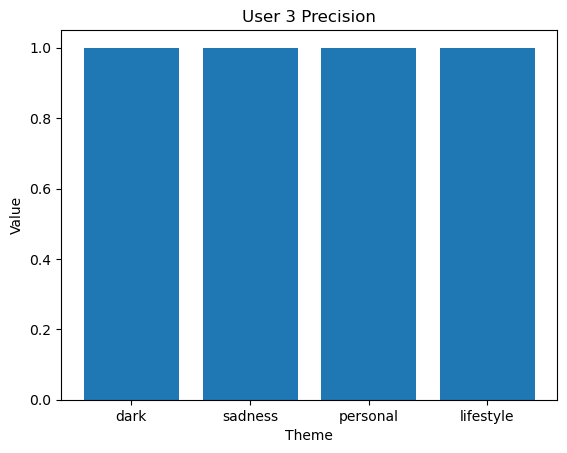

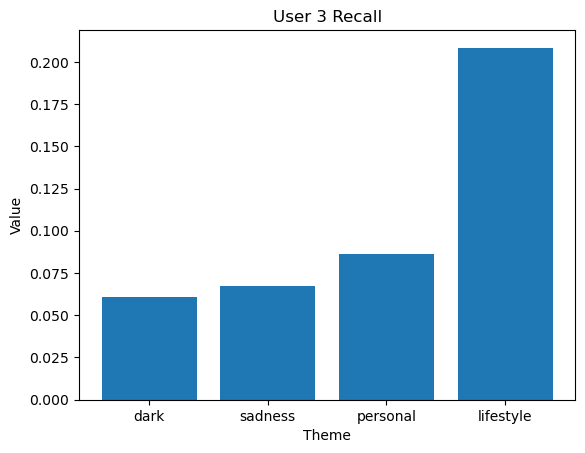

In [128]:
# Visualize metrics
import matplotlib.pyplot as plt

def plot_metrics(metrics, title):
    themes = list(metrics.keys())
    values = list(metrics.values())
    plt.bar(themes, values)
    plt.xlabel('Theme')
    plt.ylabel('Value')
    plt.title(title)
    plt.show()

plot_metrics(user3_precision, "User 3 Precision")
plot_metrics(user3_recall, "User 3 Recall")

The metrics from the real user study were different from those in the simulated scenario. Precision and recall were generally lower for the real user, likely because real preferences are more complex and less predictable than simulated ones. The real user also gave feedback that some recommendations matched their taste, but others did not. This highlights the importance of real user feedback for improving recommendation systems.
